In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
import pandas as pd
import glob, os
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

In [2]:
import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
from datetime import datetime
import datetime as dt

In [4]:
실습_df = pd.read_csv("데이터정리.csv")

In [7]:
실습_df.head()

,일시,지역,기온,평균기온,최고기온,일교차,체감온도,폭염,한파,평균 상대습도,최소 상대습도,PM10,NO2,O3,CO,SO2,남,여,발생횟수
0,2012-01-01,강원,-2.035577,-2.58,1.55,8.16,-10.592308,0,0.0,62.530769,40.769231,84.494318,0.020873,0.019098,1.012879,0.010033,3,3,6
1,2012-01-01,경기,5.600000,-3.72,0.72,8.90,-12.100000,0,0.0,69.400000,43.750000,85.856368,0.030538,0.012957,0.945866,0.009000,4,5,9
2,2012-01-01,경남,18.032500,1.16,6.65,9.90,-7.657143,0,0.0,59.228571,41.642857,62.136905,0.017499,0.021283,0.653175,0.008975,2,1,3
3,2012-01-01,경북,24.787500,-0.26,4.62,9.42,-10.550000,0,0.0,60.007143,43.285714,80.067915,0.013319,0.024346,0.723632,0.009346,6,1,7
4,2012-01-01,광주,19.182500,1.00,4.00,6.30,-8.300000,0,0.0,77.100000,65.000000,50.203704,0.024338,0.014366,0.742130,0.005657,0,2,2


In [8]:
loc_exist = ['강원','경기','경남','경북','광주','대구','대전','부산','서울','울산','인천','전남','전북','제주','충남','충북','세종']

for loc in loc_exist:
    globals()["{}_df".format(loc)] = 실습_df[실습_df["지역"]==loc]

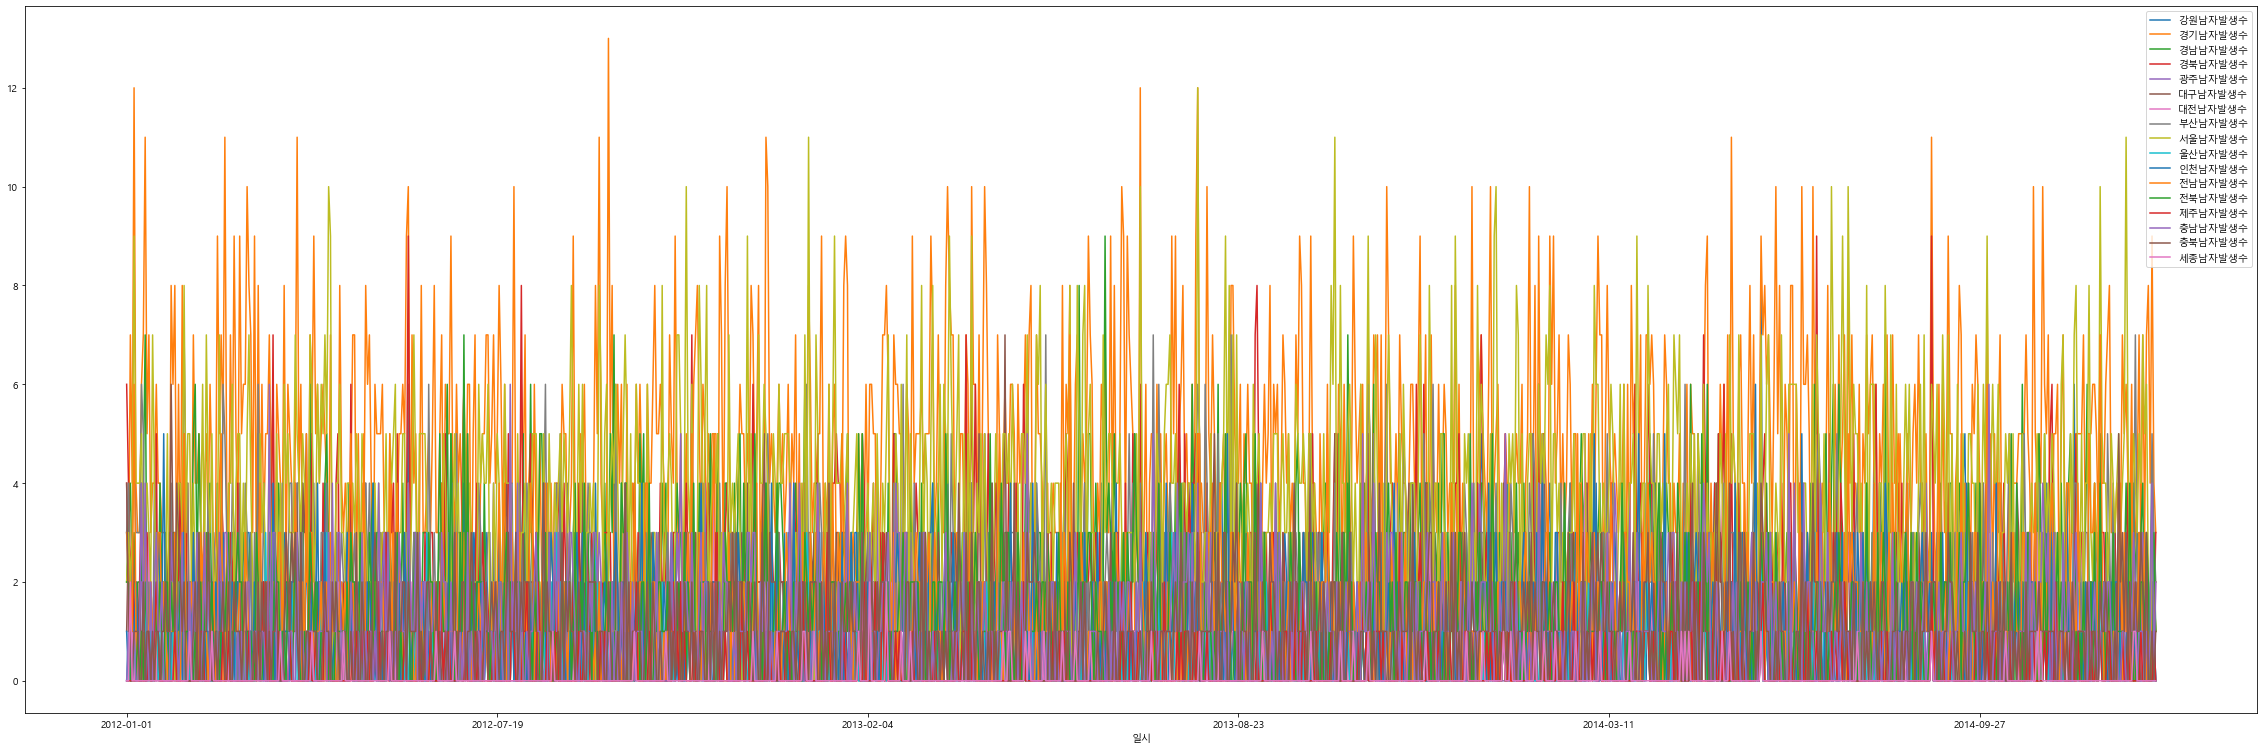

In [10]:
fig,ax = plt.subplots(1,1,figsize=(40,13))

for loc in loc_exist:
    globals()["{}_df".format(loc)].plot(x="일시", y="남",label = loc +"남자발생수",ax=ax)
    plt.legend()
plt.show()

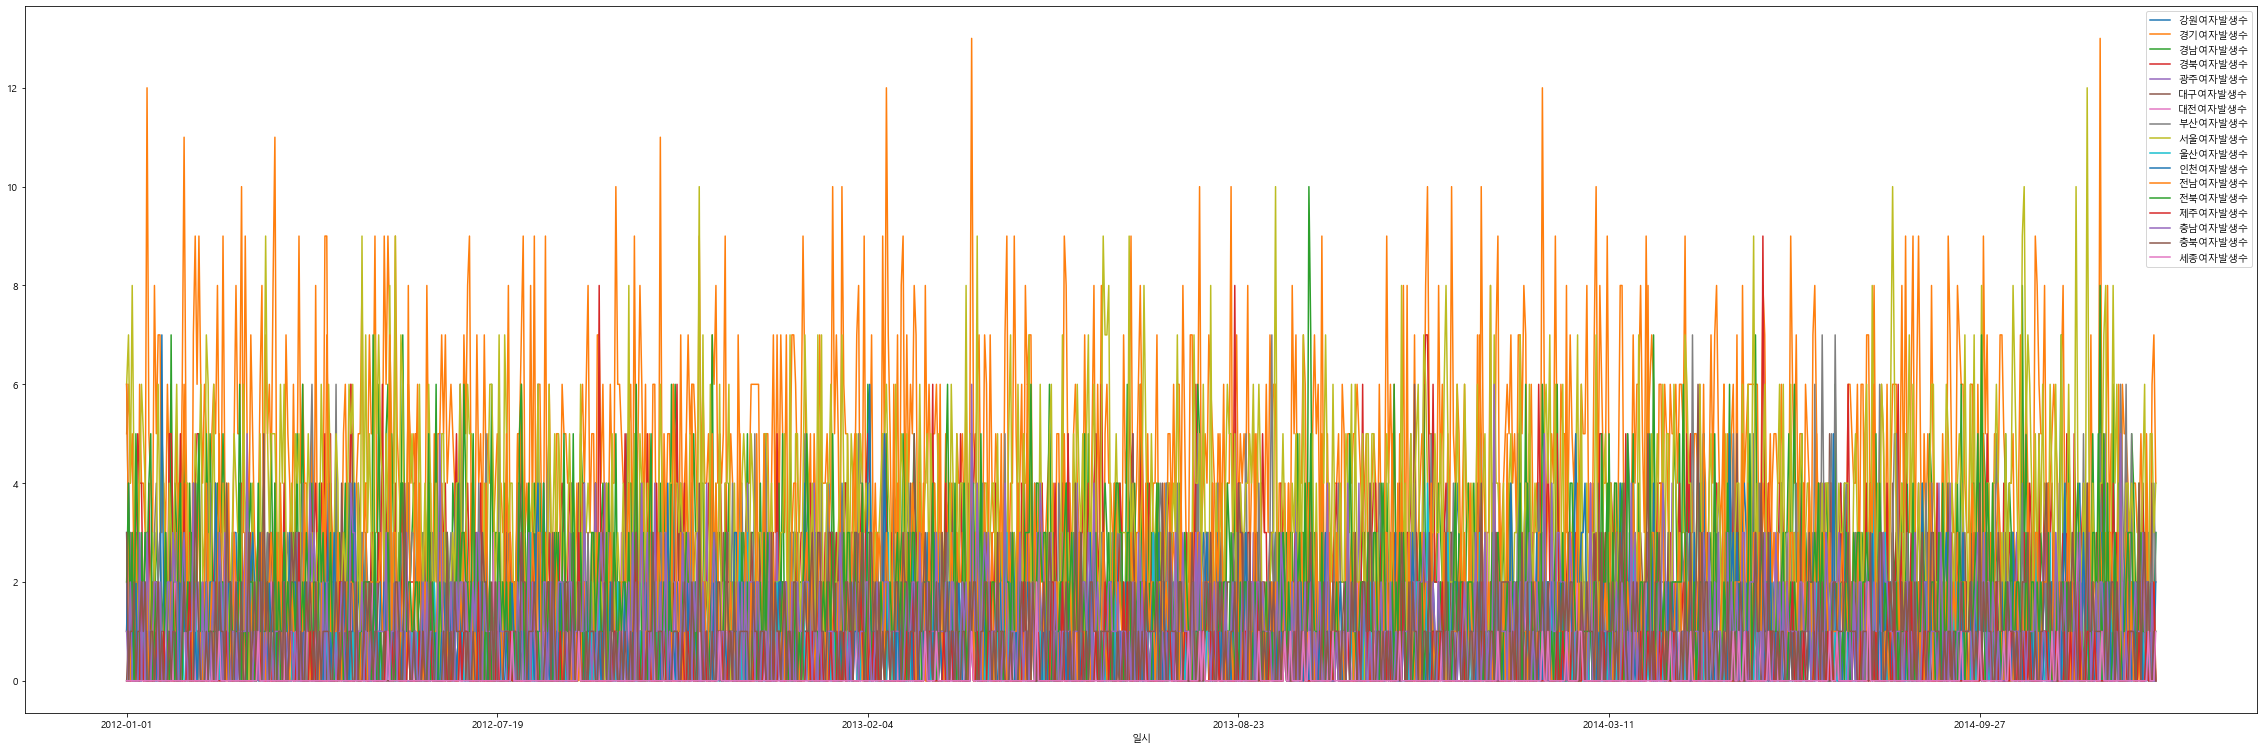

In [11]:
fig,ax = plt.subplots(1,1,figsize=(40,13))

for loc in loc_exist:
    globals()["{}_df".format(loc)].plot(x="일시", y="여",label = loc +"여자발생수",ax=ax)
    plt.legend()
plt.show()

In [12]:
남자발생수_df= pd.DataFrame()

for loc in loc_exist:
    남자발생수_df[loc]= globals()["{}_df".format(loc)]["남"].to_list()

In [13]:
남자발생수_df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북,세종
0,3,4,2,6,0,1,4,3,2,0,1,3,2,0,0,4,0
1,2,2,3,4,0,3,1,4,3,1,0,2,2,0,1,1,0
2,0,7,4,2,1,1,1,1,2,0,1,2,0,0,1,1,2
3,1,4,2,3,1,3,1,3,3,0,1,1,0,0,0,0,0
4,2,12,3,1,0,2,0,5,9,1,1,6,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0,8,0,2,0,2,0,0,2,2,0,1,2,0,0,0,0
1092,1,4,0,1,1,0,0,2,0,0,0,0,0,0,1,0,0
1093,2,9,4,1,2,1,1,5,3,0,0,1,0,0,4,1,0
1094,1,4,2,1,0,1,0,3,2,0,1,2,3,1,0,0,0


In [14]:
여자발생수_df= pd.DataFrame()

for loc in loc_exist:
    여자발생수_df[loc]= globals()["{}_df".format(loc)]["여"].to_list()

In [15]:
여자발생수_df

,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북,세종
0,3,5,1,1,2,0,1,6,6,0,1,6,2,0,1,3,0
1,0,6,1,4,1,1,2,3,7,0,4,3,4,0,0,0,0
2,0,4,3,1,2,1,1,3,4,1,0,0,1,0,2,1,0
3,2,5,1,3,1,0,0,1,8,0,1,3,3,0,0,1,0
4,1,2,0,2,1,1,0,2,4,1,1,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0,2,1,0,3,2,2,3,1,0,2,1,2,0,2,2,1
1092,1,1,0,1,2,0,1,2,5,1,0,1,1,0,0,0,0
1093,1,6,2,2,0,4,0,2,5,0,0,1,2,0,2,0,0
1094,1,7,0,0,1,0,0,4,3,0,0,2,1,2,0,1,0


In [16]:
def make_3dim_array(X1):
    X1_df = X1.copy()
    res = []
    for i in X1_df.columns:
        res.append(pd.concat([X1_df[i]],axis=1))
        
    # 건입동 - 남원읍 - 노형동 - 대륜동... 데이터프레임을 각각 하나의 요소로 바라본 뒤에 3차원으로 결합하기
    return np.stack(res)

## 남자 데이터 군집화

In [17]:
평가데이터1_3dim = make_3dim_array(남자발생수_df)

In [18]:
평가데이터1_3dim.shape

(17, 1096, 1)

In [19]:
def elbow_dtw(data):
    SSE = []
    for i in range(1,11):
        model_elec = TimeSeriesKMeans(n_clusters=i,metric='dtw',max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
        model_elec.fit(data)
        SSE.append(np.round(model_elec.inertia_,3))

    plt.plot(range(1,11),SSE,marker="o",label="DTW",color="darkorange")
    plt.legend(loc="upper right")
    plt.title("DTW find best Cluster")
    plt.show()

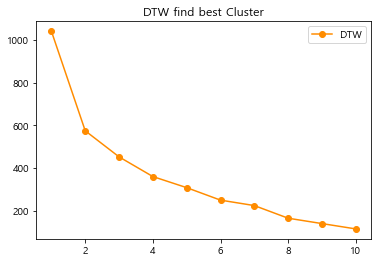

In [20]:
elbow_dtw(평가데이터1_3dim)

In [23]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
model = []
result = []

for i in range(2,5):
    cluster_model = TimeSeriesKMeans(n_clusters=i,metric="dtw",max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
    
    # 군집화 모델
    model.append(cluster_model)
    
    # 군집화 결과
    cluster_result = cluster_model.fit_predict(평가데이터1_3dim)
    result.append(cluster_result)

    print("군집개수 : ",i,"개 실루엣점수 = ",silhouette_score(평가데이터1_3dim, cluster_result, metric="dtw"))

군집개수 :  2 개 실루엣점수 =  0.5442659983320975
군집개수 :  3 개 실루엣점수 =  0.18069914550446642
군집개수 :  4 개 실루엣점수 =  0.15487709212955347


* 군집개수 :  2 개 실루엣점수 =  0.5442659983320975
* 군집개수 :  3 개 실루엣점수 =  0.18069914550446642
* 군집개수 :  4 개 실루엣점수 =  0.15487709212955347

### 군집 3개일 때

In [25]:
clutser_model = model[1]
result[1]

array([0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int64)

In [26]:
cluster_df = pd.DataFrame(index = 남자발생수_df.columns, columns=["label"])

In [27]:
cluster_df["label"] = result[1]

In [28]:
cluster_df

,label
강원,0
경기,1
경남,0
경북,0
광주,2
대구,0
대전,2
부산,0
서울,1
울산,2


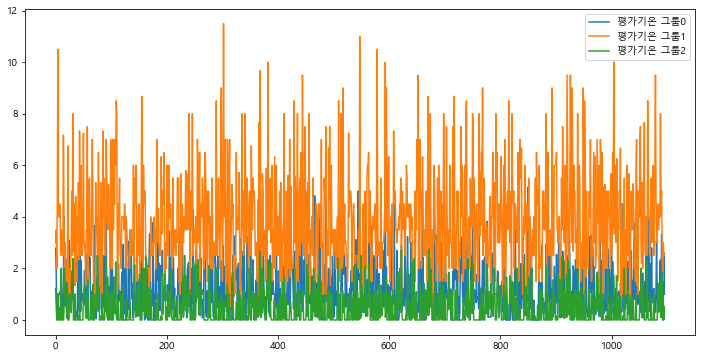

In [31]:
# 4개 군집의 중심점 시각화 해보기
fig,ax = plt.subplots(1,1,figsize=(12,6))
for i in range(3):
    df = pd.DataFrame(index = 남자발생수_df.index,columns=["남"],
                      data = clutser_model.cluster_centers_[i])
    
    # 군집 중심점으로 그래프 그리기
    (df.iloc[:,0]).plot(ax = ax,label="평가기온 그룹" +str(i))
    ax.legend()

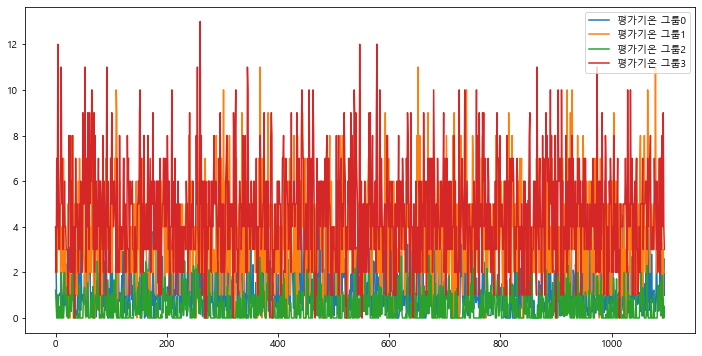

In [32]:
clutser_model = model[2]
result[2]
cluster_df = pd.DataFrame(index = 남자발생수_df.columns, columns=["label"])
cluster_df["label"] = result[2]
# 4개 군집의 중심점 시각화 해보기
fig,ax = plt.subplots(1,1,figsize=(12,6))
for i in range(4):
    df = pd.DataFrame(index = 남자발생수_df.index,columns=["남"],
                      data = clutser_model.cluster_centers_[i])
    
    # 군집 중심점으로 그래프 그리기
    (df.iloc[:,0]).plot(ax = ax,label="평가기온 그룹" +str(i))
    ax.legend()

## 여자데이터 군집화

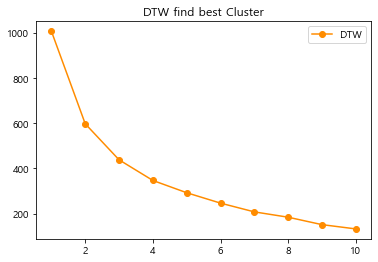

In [33]:
평가데이터1_3dim = make_3dim_array(여자발생수_df)
elbow_dtw(평가데이터1_3dim)

In [34]:
model = []
result = []

for i in range(2,5):
    cluster_model = TimeSeriesKMeans(n_clusters=i,metric="dtw",max_iter=30,tol=1e-06, n_init=1,max_iter_barycenter=100,
                             metric_params=None,n_jobs=-1,dtw_inertia=False, verbose=0,
                             random_state=0,init='k-means++')
    
    # 군집화 모델
    model.append(cluster_model)
    
    # 군집화 결과
    cluster_result = cluster_model.fit_predict(평가데이터1_3dim)
    result.append(cluster_result)

    print("군집개수 : ",i,"개 실루엣점수 = ",silhouette_score(평가데이터1_3dim, cluster_result, metric="dtw"))

군집개수 :  2 개 실루엣점수 =  0.5113674370594002
군집개수 :  3 개 실루엣점수 =  0.24981737720980157
군집개수 :  4 개 실루엣점수 =  0.23674022733432806


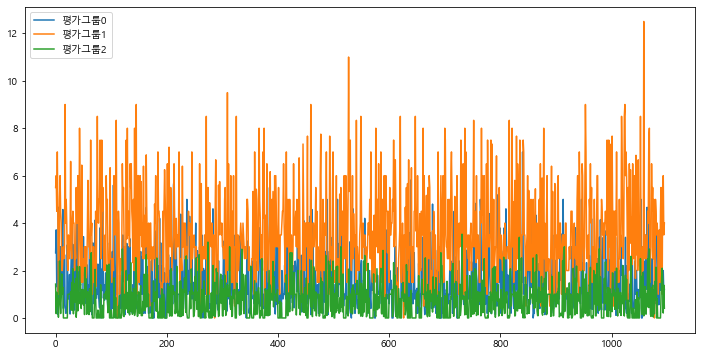

In [36]:
clutser_model = model[1]
result[1]
cluster_df = pd.DataFrame(index = 남자발생수_df.columns, columns=["label"])
cluster_df["label"] = result[1]
# 4개 군집의 중심점 시각화 해보기
fig,ax = plt.subplots(1,1,figsize=(12,6))
for i in range(3):
    df = pd.DataFrame(index = 여자발생수_df.index,columns=["여"],
                      data = clutser_model.cluster_centers_[i])
    
    # 군집 중심점으로 그래프 그리기
    (df.iloc[:,0]).plot(ax = ax,label="평가그룹" +str(i))
    ax.legend()

In [37]:
cluster_df

,label
강원,2
경기,1
경남,0
경북,0
광주,2
대구,2
대전,2
부산,0
서울,1
울산,2


## 군집화 결론
* 3개의 그룹으로 나누는게 좋음
* 남자의 경우: label_0: '강원','경남','경북', '대구', '부산','인천','전남','전북','충남' / label_1: '경기','서울' / label_2: '광주','대전','울산','제주', '충북', '세종'

* 여자의 경우: label_0: '경남','경북','부산', '전남', '전북' / label_1: '경기','서울' / label_2: '강원','광주','대구','대전','울산','인천','제주','충남', '충북', '세종' 